In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from jupyterlab_server.test_utils import maybe_patch_ioloop

In [7]:
df = pd.read_csv("Post45_NEAData_Final.csv")

In [8]:
df.head()

,nea_person_id,full_name_lastfirst,full_name_firstlast,given_name_middle,family_name,nea_grant_year,other_nea_grant,country,us_state,hometown,...,gender,race_ethnicity,ba,ba2,ma,ma2,phd,mfa,mfa2,post45_hathi_entry
0,19,"Adams, Leonie",Leonie Adams,Leonie,Adams,1966,NaN,USA,NY,New York,...,female,uniden,Barnard College,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,177,"Belitt, Ben",Ben Belitt,Ben,Belitt,1966,NaN,USA,VT,Bennington,...,male,uniden,University of Virginia,NaN,University of Virginia,NaN,NaN,NaN,NaN,NaN
2,235,"Bird, Laurel",Laurel Bird,Laurel,Bird,1966,NaN,USA,TN,Knoxville,...,female,uniden,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,282,"Bourjaily, Vance",Vance Bourjaily,Vance,Bourjaily,1966,1979,USA,IA,Iowa City,...,male,uniden,Bowdoin College,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,303,"Brasfield, Samuel",Samuel Brasfield,Samuel,Brasfield,1966,NaN,USA,AL,Demopolis,...,male,uniden,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# how many don't have gender listed?
df[df.gender == "unknown"]

,nea_person_id,full_name_lastfirst,full_name_firstlast,given_name_middle,family_name,nea_grant_year,other_nea_grant,country,us_state,hometown,...,gender,race_ethnicity,ba,ba2,ma,ma2,phd,mfa,mfa2,post45_hathi_entry
493,348,"Brown, Lennox",Lennox Brown,Lennox,Brown,1976,NaN,USA,NY,Queens,...,unknown,black / caribam,St Marys College,University of Western Ontario,University of Toronto,NaN,NaN,NaN,NaN,NaN
705,2315,"Rico, Noel",Noel Rico,Noel,Rico,1977,NaN,USA,NY,New York,...,unknown,uniden,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
759,1051,"Gourdine, Delice",Delice Gourdine,Delice,Gourdine,1978,NaN,USA,MI,St. Joseph,...,unknown,uniden,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
910,1218,"Hernandez, Luz",Luz Hernandez,Luz,Hernandez,1979,NaN,USA,CA,Oakland,...,unknown,uniden,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999,467,"Chambers, George",George Chambers,George,Chambers,1980,NaN,USA,IL,Peoria,...,unknown,uniden,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
1114,2738,"Swails, Laurell",Laurell Swails,Laurell,Swails,1980,NaN,USA,OR,Lake Oswego,...,unknown,uniden,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1143,193,"Bennett, George",George Bennett,George,Bennett,1981,NaN,USA,NY,New York,...,unknown,uniden,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
1314,2698,"Stevens, Alex",Alex Stevens,Alex,Stevens,1982,NaN,USA,MD,Queen Anne,...,unknown,uniden,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1630,2029,"Nichols, Maris",Maris Nichols,Maris,Nichols,1985,NaN,USA,MA,Pittsfield,...,unknown,uniden,NaN,NaN,NaN,NaN,NaN,Stanford University,NaN,NaN
1944,2709,"Strange, George",George Strange,George,Strange,1988,NaN,USA,GA,Douglas,...,unknown,uniden,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# how many don't have a race or ethnicity
print("No race", len(df[df.race_ethnicity == "uniden"]))
print("Race", len(df[df.race_ethnicity != "uniden"]))

No race 2617
Race 1088


In [11]:
df.race_ethnicity.value_counts()

race_ethnicity
uniden                         2617
afam                            220
white                           195
uniden / jewish                 136
asianam                         118
                               ... 
uniden / romanianam               1
caribam / latinx                  1
indigenous / latinx / white       1
latinx / portugueseam             1
uniden / ukranianam               1
Name: count, Length: 94, dtype: int64

In [12]:
df.race_ethnicity = df.race_ethnicity.replace("uniden / ","", regex = True)

In [13]:
r_e = df.race_ethnicity.value_counts()
r_e

race_ethnicity
uniden                         2617
afam                            220
white                           195
jewish                          136
asianam                         118
                               ... 
romanianam                        1
caribam / latinx                  1
indigenous / latinx / white       1
latinx / portugueseam             1
ukranianam                        1
Name: count, Length: 94, dtype: int64

<Axes: title={'center': 'Race of NEA Creative Writing Recipients'}, xlabel='race_ethnicity'>

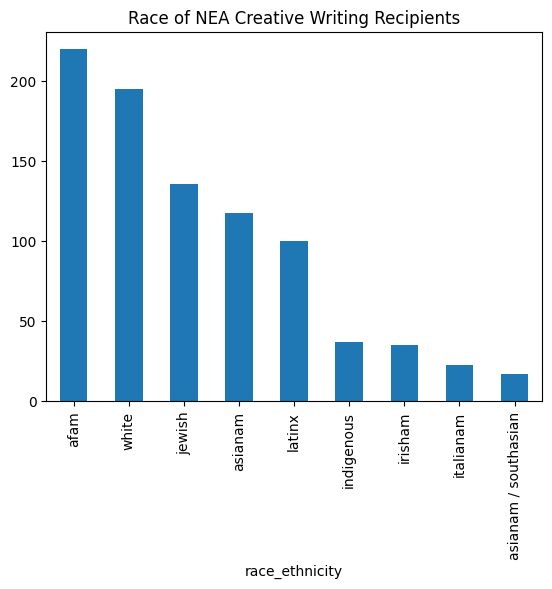

In [14]:
race = r_e[1:10]
race.plot.bar(title = "Race of NEA Creative Writing Recipients")

In [15]:
ba = df.ba.value_counts()[:11]
ba

ba
Harvard University                   106
Columbia University                   68
Yale University                       64
University of California Berkeley     59
University of Michigan Ann Arbor      50
Brown University                      42
San Francisco State University        40
Oberlin College                       37
New York University                   36
University of Iowa                    35
University of Washington              33
Name: count, dtype: int64

In [16]:
print("ba listed ",len(df) - df.ba.isna().sum())
print("ba listed ", ((len(df) - df.ba.isna().sum())/len(df))*100,"%")

ba listed  2973
ba listed  80.24291497975709 %


<Axes: xlabel='ba'>

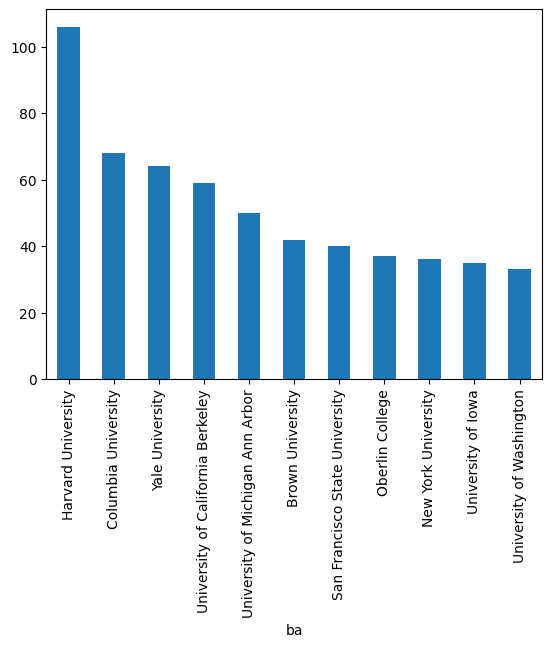

In [17]:
ba.plot.bar()

In [18]:
ivies = ["Brown University", "Columbia University", "Cornell University", "Dartmouth College", 
"Harvard University", "University of Pennsylvania", "Princeton University", "Yale University"]

df["Ivy"] = df.ba.isin(ivies)
df.Ivy.value_counts()

Ivy
False    3327
True      378
Name: count, dtype: int64

In [19]:
ivies = ["Brown University", "Columbia University", "Cornell University", "Dartmouth College", 
"Harvard University", "University of Pennsylvania", "Princeton University", "Yale University"]
tier_1_schools = [
    "Stanford University",
    "Massachusetts Institute of Technology (MIT)",
    "California Institute of Technology (Caltech)",
    "University of Chicago",
    "Duke University",
    "Northwestern University",
    "University of California, Berkeley (UC Berkeley)",
    "University of California, Los Angeles (UCLA)",
    "University of Michigan, Ann Arbor",
    "University of Texas at Austin",
    "Carnegie Mellon University",
    "University of Southern California (USC)",
    "Johns Hopkins University",
    "Georgia Institute of Technology (Georgia Tech)",
    "University of North Carolina at Chapel Hill"
]

tier_2_schools = [
    "University of Washington",
    "University of Wisconsin-Madison",
    "University of Illinois Urbana-Champaign",
    "University of Florida",
    "Pennsylvania State University (Penn State)",
    "Ohio State University",
    "Purdue University",
    "University of Maryland, College Park",
    "Texas A&M University",
    "University of Minnesota, Twin Cities",
    "University of Virginia",
    "University of California, San Diego (UCSD)",
    "University of California, Davis (UC Davis)",
    "Boston University",
    "University of Rochester",
    "Michigan State University",
    "Indiana University Bloomington",
    "University of Colorado Boulder",
    "University of Arizona",
    "University of Utah"
]

top_schools = ivies + tier_1_schools

# Define a function to fill the new column based on string matching
def fill_new_column(row):
    if row['ba'] in ivies:
        return "Ivy League"
    elif row['ba'] in tier_1_schools:
        return "Tier 1"
    elif row['ba'] in tier_2_schools:
        return "Tier 2"
    else:
        return "not_found"

# Apply the function to create a new column
df['Tier'] = df.apply(fill_new_column, axis=1)

df.Tier.value_counts()

Tier
not_found     3059
Ivy League     378
Tier 2         164
Tier 1         104
Name: count, dtype: int64

In [20]:
top_schools = ivies + tier_1_schools

# Define a function to fill the new column based on string matching
def fill_new_column_top(row):
    if row['ba'] in top_schools:
        return "Top School"
    else:
        return "Other"
        
# Apply the function to create a new column
df['Top_schools'] = df.apply(fill_new_column_top, axis=1)

top_schools = df.Top_schools.value_counts(normalize=True)
top_schools

Top_schools
Other         0.869906
Top School    0.130094
Name: proportion, dtype: float64

<Axes: ylabel='proportion'>

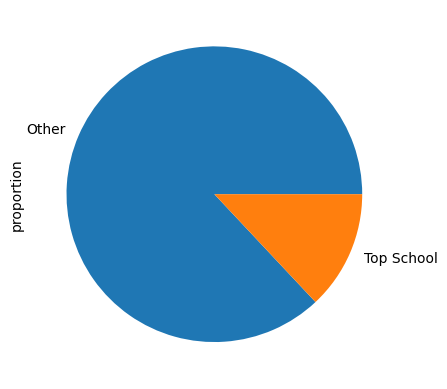

In [21]:
top_schools.plot.pie()

# NYTimes

In [25]:
nyt = pd.read_csv("nyt_full.tsv", sep = '\t')
nyt.head()

,year,week,rank,title_id,title,author
0,1931,1931-10-12,1,6477,THE TEN COMMANDMENTS,Warwick Deeping
1,1931,1931-10-12,2,1808,FINCHE'S FORTUNE,Mazo de la Roche
2,1931,1931-10-12,3,5304,THE GOOD EARTH,Pearl S. Buck
3,1931,1931-10-12,4,4038,SHADOWS ON THE ROCK,Willa Cather
4,1931,1931-10-12,5,3946,SCARMOUCHE THE KING MAKER,Rafael Sabatini


In [26]:
nyt.author.nunique()

2210

In [27]:
print(nyt.author)

0                        Warwick Deeping
1                       Mazo de la Roche
2                          Pearl S. Buck
3                           Willa Cather
4                        Rafael Sabatini
                      ...               
60381                             Halsey
60382                       Brit Bennett
60383                        Delia Owens
60384                    Fredrik Backman
60385    Clive Cussler and Boyd Morrison
Name: author, Length: 60386, dtype: object


In [32]:
nyt_authors = nyt.author.unique().tolist()

# Because GPT can only do so many at once
import itertools as it

cnt = 0
auth50 = list(it.batched(nyt_authors, 50))
for item in auth50:
    cnt+=1
    c = str(cnt)
    with open("nytimes_auth/authors"+c+".txt", "w") as output:
        output.write(str(item))


# Use GPT to gather data about the authors

In [45]:
import openai
myapikey = open('my_gpt_apikey.txt').readline().rstrip()

client = OpenAI(api_key=myapikey)

completion = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "system", "content": "You are a literary historian."},
        {
            "role": "user",
            "content": "What is Warwick Deeping's birth year?"
        }
    ]
)




In [46]:
print(completion.choices[0].message)

ChatCompletionMessage(content='Warwick Deeping was born in the year 1877.', refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None)


In [ ]:
with open("../nytimes/authors.txt", "w") as output:
    output.write(str(nyt_authors))

In [ ]:
nyt.title.nunique()

In [ ]:
author_demo = pd.read_csv("../nytimes/authors_demographics.csv")

In [ ]:
author_demo.head()

In [ ]:
author_demo = author_demo.replace('NaN', pd.NA)

In [ ]:
author_demo.head()